### 신경망 학습이란 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것을 뜻합니다.

## 4.1 데이터에서 학습한다. 

신경망의 특징은 데이터를 보고 학습할 수 있다는 점입니다.

데이터에서 학습한다는 것은 가중치 매개변수의 값을 데이터를 보고 자동으로 결정한다는 뜻이죠.

### 4.1.1 데이터 주도 학습


기계학습에서는 사람의 개입을 최소화하고 수집한 데이터로부터 패턴을 찾으려 시도합니다. 신경망은 이미지를 '있는 그대로' 학습합니다. 두번째 접근 방식( 특징과 기계 학습방식) 에서는 특징을 사람이 설계했지만, 신경망은 이미지에 포함된 중요한 특징까지도 '기계'가 스스로 학습할 것입니다. 
end - to - end  학습


### 4.1.2 훈련데이터와 시험데이터


##  4.2 손실함수

신경망에서는 현재의 상태를 '하나의 지표'로 표현합니다. 그리고 그 지표를 가장 좋게 만들어주는 가중치 매개변수의 값을 탐색하는 것입니다. 
신경망도 '하나의 지표'를 기준으로 최적의 매개변수값을 탐색합니다. 신경망 학습에서 사용하는 지표는 손실함수 라고 합니다.  
손실함수는 일반적으로 오차제곱의 합과 교차 엔트로피 오차를 사용합니다.

### 4.2.1 오차 제곱합



In [1]:
def sum_squares_error(y,t):
    return 0.5 * np.sum((y-t)**2)

y 는 소프트 맥스 함수의 출력 (확률)  
t 는 정답 테이블

In [2]:
y =[0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
t =[0,0,1,0,0,0,0,0,0,0]

In [3]:
import numpy as np


In [4]:
sum_squares_error(np.array(y),np.array(t))

0.09750000000000003

만약 정답이 2인데 7번째가 정답이라고 생각하고 확률이 제일 높을 경우


In [5]:
y =[0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]

In [6]:
sum_squares_error(np.array(y),np.array(t))


0.5975

당연히 정답이 아니므로 오차값이 더 크게 나오는 것을 확인할 수 있다.


### 4.2.2 교차 엔트로피 오차


### log x 함수 그리기

In [7]:
import numpy as np
import matplotlib.pylab as plt

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3052\4137798536.py:2: RuntimeWarning: divide by zero encountered in log
  return np.log(x)


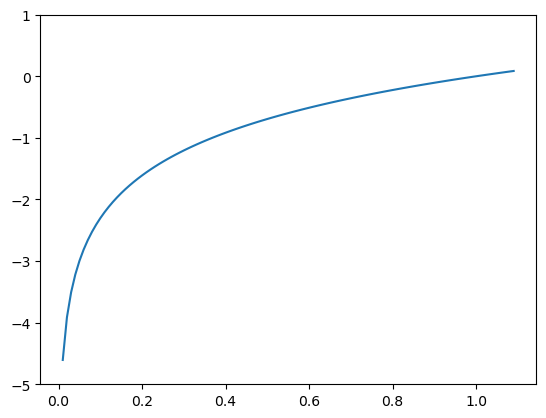

In [8]:
def log_function(x):
    return np.log(x)

x= np.arange(0.0,1.1,0.01) #-5.0 부터 5.0  까지 0.1 간격으로 생성
y= log_function(x)
plt.plot(x,y) #x, y 로 그래프 만들기
plt.ylim(-5.0,1.0) # y축의 범위 지정
plt.show()# r그래프 보여주기

In [9]:
def cross_entropy_error(y,t):
    delta =1e-7
    return -np.sum(t*np.log(y+delta))


In [10]:
y =[0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
cross_entropy_error(np.array(y),np.array(t))

0.510825457099338

In [11]:
y =[0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]

In [12]:
cross_entropy_error(np.array(y),np.array(t))

2.302584092994546

### 4.2.3 미니배치 연습


지금까지 데이터 하나에 대한 손실 함수만 생각해 왔으니, 이제 훈련데이터 모두에 대한 손실 함수의 합을 구하는 방법을 생각해보겠습니다.
데이터가 N개라면 손실함수를 구한뒤 모두 더하고 마지막에 N개로 나누어 정규화를 해줍니다. 이렇게 하면 훈련데이터가 1000개이든 10,000개든 상관없이 평균 손실 함수를 구할 수 있습니다.


그런데 Mnist 데이터 셋은 훈련데이터가 60,000개 엿습니다. 그래서 모든 데이터를 대상으로 손실함 수의 합을 구하렴녀 시간이 좀 걸립니다. 
이 많은 데이터를 대상으로 일일히 손실함수를 계산한느 것은 현실적이지 않겠죠. 이런 경우 데이터 일부를 추려 전체의 '근사치'로 이용할 수 있습니다. 
신경망 학습에서도 훈련 데이터로 부터 일부만 골라 학습을 수행합니다. 이 일부를 미니 배치라고 하죠.

미니 배치 학습을 구현하는, 즉 훈련데이터에서 지정한 수의 데이터를 무작위로 골라 내는 코드를 작성해봅시다. 

In [13]:
import sys, os
sys.path.append("C:\\Users\\Administrator\\jupyter\\deep-learning-from-scratch-master")
import numpy as np
from dataset.mnist import load_mnist

# 4.2.3 미니배치 학습
# 훈련 데이터 전체에 대한 오차함수
# E = -1/N * ∑ _n (∑ _k (tk * log(yk)))
# N : 데이터의 개수
# 훈련 데이터 전체에 대한 손실 함수를 계산하기에는 시간이 오래걸리기 때문에
# 일부를 추려 전체의 근사치로 이용할 수 있다.
(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=False)
# \ 줄바꿈인듯
print(x_train.shape)  # (60000, 784)
print(t_train.shape)  # 원-핫 인코딩 된 정답 레이블 (60000, 10)

# 무작위 10개 추출
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size) #60000,10
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

(60000, 784)
(60000,)


In [14]:
np.random.choice(train_size, batch_size)

array([40784, 55199, 18961, 35309, 41692, 19056, 34734, 55555, 31595,
       17406])

In [15]:
x_train[batch_mask]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
t_train[batch_mask]

array([0, 8, 1, 3, 6, 2, 4, 8, 6, 1], dtype=uint8)

In [17]:
# 4.2.4 (배치용) 교차 엔트로피 오차 구현하기
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y+1e-7)) / batch_size

y가 1차원이라면, 즉 데이터 하나당 교차 엔트로피 오차를 구하는 경우는 reshape 함수로 데이터의 형상을 바꿔줍니다. 그리고 배치의 크기로 나눠 정규화 하고 이미지 1장당 평균 교차 에트로피 오차를 계산합니다. 
정답이 원 -핫 인코딩이 아니라 '2' 나 '8' 등의 숫자 레이블로 주어졌을때 교차 엔트로피 오차는 다음과 같이 구현가능합니다.

In [18]:
# 4.2.4 (배치용) 교차 엔트로피 오차 구현하기
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y[np.arange(batch_size), t])) / batch_size

y\[np.arange(batch_size), t\] 는 y(0,2),y(1,7),y(2,0),y(3,9),y(4,4)인 넘파이 배열을 생성합니다. batchsize =5일 경우.

### 4.2.5 왜 손실 함수를 설정하는가?


'정확도'라는 지표를 놔두고 '손실 함수의 값'이라는 우회적인 방법을 택하는 이유는 무엇일까요.

이점은 신경망 학습에서의 '미분'의 역할에 주목합니다.

신경망 학습에서는 최적의 매개변수(가중치와 편향) 을 탐색할 때 손실함수의 값을 최대한 작게 하는 매개변수 값을 찾습니다. 이때 매개변수의 미분(정확히는 기울기)을 계산하고, 그 미분값ㅇ르 단서로 매개변수의 값을 서서히 갱신하는 과정을 반복합니다.

정확도를 지표로 삼아서는 안되는 이유는 매개변수의 미분이 대부분의 장소에서 0이 되기 때문이다.


정확도를 지표로 삼으면 매개변수의 미분이 대부분의 장소에서 0이 되는 이유는 무엇일까요?
한 신경망이 100장의 훈련 데이터 중 32장을 올바르게 인식한다고 합니다.
그렇다면 정확도는 32% 입니다.만약 정확도가 지표였다면 가중치 매개변수의 값을 조금 바꾼다고 해도 정확도는 그대로 32% 일 겁니다. 즉, 매개 변수를 약간만 조정해서는 정확도가 개선되지 않고 일정하게 유지됩니다. 혹 정확도가 개선된다 하더라도 그 값은 32.0123% 와 같은 연속적인 변화보다는 33%나 34% 처럼 불연속 적인 띄엄띄엄한 값으로 바뀌어 버립니다. 

한편, 손실 함수를 지표로 삼았다면 어떨까요? 손실함수는 0.9243 같은 수치로 나타납니다.ㅣ 그리고 매개변수의 값이 조금 변하면 그에 반응하여 손실 함수의 값도 0.93432 처럼 연속적으로 변화하는 것입니다. 
정확도는 매개변수의 미소한 변화에는 거의 반응을 보이지 않고, 반응이 있더라도 그 값이 `불연속적`으로 갑자기 변화합니다. 이는 '계단 함수'를 활성화 함수로 사용하지 않는 이유와도 들어 맞습니다. 계단 함수의 미분은 대부분의 장소(0) 이외의 부분에서는 전부 기울기가 0 입니다 그 결과 계단 함수를 이용하면 손실 함수를 지표로 삼는 게 아무 의미가 없게 됩니다. 매개변수의 작은 변화가 주 는 파장을 계단 함수가 말살하여 손실 함수의 값에는 아무런 변화가 나타나지 않기 때문입니다.

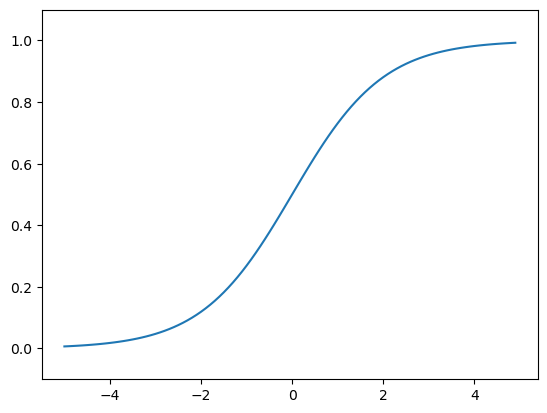

In [20]:
def sigmoid(x):
    return 1/ (1 +np.exp(-x))

x =np.arange(-5.0,5.0,0.1)
y =sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

계단함수는 한순간만 변화를 일으키지만 , 시그모이드 함수의 미분(접선)은 그림과 같이 연속적으로 변하고 곡선의 기울기도 연속적으로 변합니다. 즉, 시그모이드의 함수의 미분은 어느 장소라도 0이 되지 않습니다. 이는 신경망 학습에서 중요한 성질로, 기울기가 0이 되지 않는 덕분에 신경망이 올바르게 학습 할 수 있는 것입니다. 

## 4.3 수치 미분 (0으로 수렴하는 것을 구현하기 힘들어서 근사치로 계산하는 미분)

In [25]:
#수치 미분 구현 
def numerical_diff(f,x):
    h = 1e-4 #0.0001 너무 작은 값이면 반올림 오차 문제를 이르켜서 0.0000000000000000000001 은 0.0으로 인식한다.
    return (f(x+h)-f(x-h))/ (2*h) # 전방 차분 활용

### 4.3.2 수치 미분의 예

y =0.01x<sup>2</sup>  + 0.1x <br>
   escape 문자 /sup

In [22]:
def function_1(x):
    return 0.01*x**2 +0.1*x

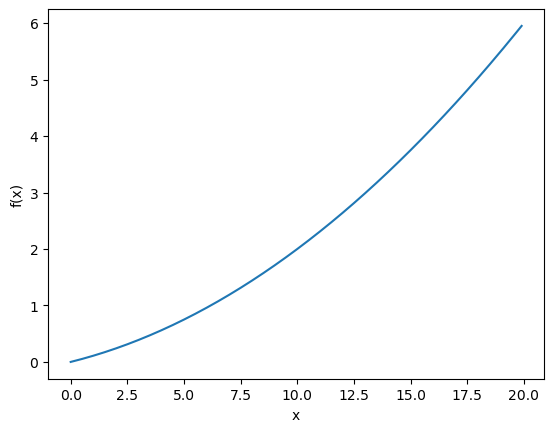

In [23]:
x = np.arange(0.0, 20.0, 0.1)  # 0에서 20까지 간격 0.1인 배열 x를 만든다.
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
# plt.show()

그럼 x = 5 일 때와 10일 때 이 함수의 미분을 구해봅시다. 

In [26]:
# x = 5, 10일때 미분
print(numerical_diff(function_1, 5))   # 0.200000000000089
print(numerical_diff(function_1, 10))  # 0.29999999999996696

0.1999999999990898
0.2999999999986347


진정한 미분값인 0.2 와 0.3 과 오차가 매우 작음을 확인할 수 있다. 

### 4.3.3 편미분

f(x,y) = x<sup>2</sup> +y<sup>2</sup>

In [2]:
def function_2(x):
    return x[0] **2 +x[1]**2
# return np.sum(x**2)